# Selecting texts with tesseract

In [63]:
import pytesseract
from pytesseract import Output
import numpy as np
import cv2 # OpenCV
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

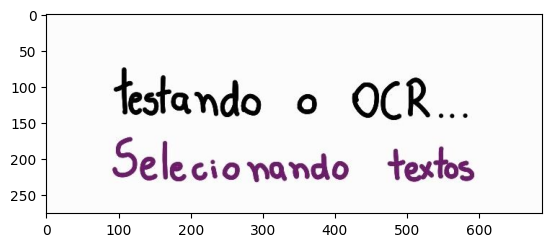

In [64]:
img = cv2.imread('text-recognize/Imagens/Aula3-testando.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb)

In [65]:
config_tesseract = '--tessdata-dir /usr/share/tesseract-ocr/4.00/tessdata' 

result = pytesseract.image_to_data(rgb, output_type=Output.DICT, config=config_tesseract, lang='por')

result

{'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2],
 'left': [0, 92, 92, 94, 94, 348, 425, 92, 92, 474],
 'top': [0, 74, 74, 74, 74, 111, 88, 171, 171, 184],
 'width': [688, 502, 502, 491, 204, 28, 160, 502, 328, 120],
 'height': [276, 159, 159, 73, 69, 28, 59, 62, 62, 49],
 'conf': ['-1', '-1', '-1', '-1', 58, 95, 70, '-1', 91, 64],
 'text': ['',
  '',
  '',
  '',
  'testando',
  'o',
  'OCR...',
  '',
  'Selecionando',
  'tests']}

level: This indicates the hierarchical level of each element in the text structure. The hierarchy is typically:

    Page
    Block (text blocks)
    Paragraph
    Line
    Word

So, a level value of 5 refers to a word, and 4 refers to a line.

page_num: 
This specifies the page number where the element is located. In this case, all elements are from page 1, as indicated by [1, 1, 1...].

block_num:
Represents the text block number within the page. Blocks are larger sections of text, like paragraphs or images. Here, block 1 is the primary block of text being processed.

par_num:
Refers to the paragraph number within a block. It helps to identify which paragraph the word or line belongs to.

line_num:
Indicates the line number within a paragraph. This helps to group words that belong to the same line.

word_num:
Identifies the word number within a line. A word_num of 1 refers to the first word of the line, 2 to the second word, and so on.

left:
The x-coordinate of the left boundary of the detected element (word, line, block, etc.), measured in pixels from the left side of the image.

top:
The y-coordinate of the top boundary of the detected element, measured in pixels from the top of the image.

width:
The width, in pixels, of the detected element.

height:
The height, in pixels, of the detected element.

conf:
The confidence level of the detected text, ranging from 0 to 100. A -1 value usually indicates non-text elements or regions where no text was detected.

text:
The actual recognized text within each word or element. In this case, it detected words like "testando," "o," "OCR..." etc.

In [66]:
min_conf = 40

# Bounding box

 - Caixa delimitadora nos textos das imagens

In [67]:
def textBox(result, img, color=(255, 100, 0)):
    x = result['left'][i]
    y = result['top'][i]
    w = result['width'][i]
    h = result['height'][i]

    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)

    return x, y, img

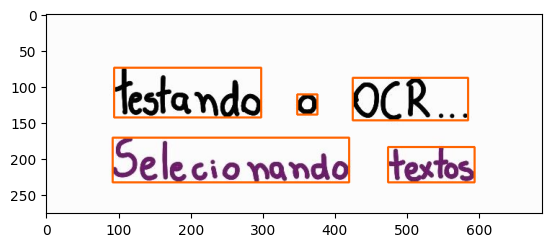

In [68]:
copy_img = rgb.copy()

for i in range(len(result['text'])):
    if int(result['conf'][i]) > min_conf:
        x, y, img = textBox(result, copy_img)

plt.imshow(copy_img)

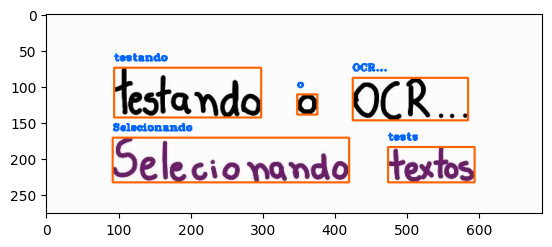

In [69]:
copy_img = rgb.copy()

for i in range(len(result['text'])):
    if int(result['conf'][i]) > min_conf:
        x, y, img = textBox(result, copy_img)
        text = result['text'][i]
        cv2.putText(copy_img, text, (x, y-10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.7, (0, 100, 255), 2)

plt.imshow(copy_img)

# Testing external fonts

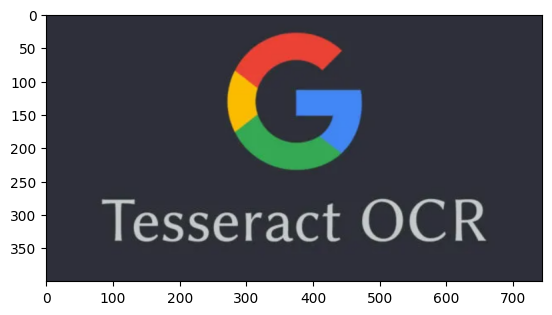

In [70]:
img_03 = cv2.imread('text-recognize/Imagens/Aula1-ocr.png')
rgb_03 = cv2.cvtColor(img_03, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_03)

In [71]:
config_tesseract = '--tessdata-dir /usr/share/tesseract-ocr/4.00/tessdata' 

result = pytesseract.image_to_data(rgb_03, output_type=Output.DICT, config=config_tesseract, lang='por')

result

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 2],
 'left': [0, 272, 272, 272, 272, 84, 84, 84, 84, 474],
 'top': [0, 28, 28, 28, 28, 277, 277, 277, 278, 277],
 'width': [744, 202, 202, 202, 202, 576, 576, 576, 357, 186],
 'height': [400, 205, 205, 205, 205, 64, 64, 64, 63, 64],
 'conf': ['-1', '-1', '-1', '-1', 32, '-1', '-1', '-1', 91, 95],
 'text': ['', '', '', '', 'e', '', '', '', 'Tesseract', 'OCR']}

In [72]:
font = 'text-recognize/Imagens/calibri.ttf'

In [73]:
def drawText(text, x, y, img, font, size=20):
    font = ImageFont.truetype(font, size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - size), text, font=font)
    img = np.array(img_pil)

    return img

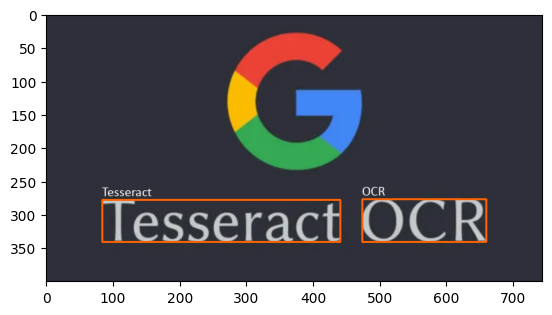

In [74]:
copy_img = rgb_03.copy()

for i in range(len(result['text'])):
    if int(result['conf'][i]) > min_conf:
        x, y, img = textBox(result, copy_img)
        text = result['text'][i]
        # cv2.putText(copy_img, text, (x, y-10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.7, (0, 100, 255), 2)
        copy_img = drawText(text, x, y, copy_img, font)


plt.imshow(copy_img)

# TOPICS
-   Identificar o funcionamento do OSD e quais as informações ele traz consigo;
-   Construir o bounding box com base nos valores de eixos x e y e das alturas e larguras de cada texto;
-   Extrair os textos, com OSD, e inserir nas imagens;
-  Importar fontes externas para os projetos do OpenCV, utilizando a biblioteca PIL.